In [8]:
import matplotlib
import matplotlib.pyplot as plt
from random import choice, randrange

In [16]:
my_x = []
my_y = []
for i in range(100):
    my_x.append(i)
    my_y.append(i)

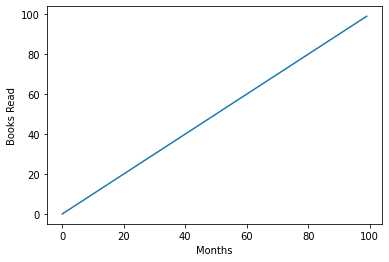

In [19]:
plt.xlabel('Months')
plt.ylabel('Books Read')
plt.plot(my_x, my_y)
#plt.savefig('./images/matplot.png', transparent=True)
plt.savefig('./images/matplot.png')

In [21]:
#Main Program for Convert Single Image to Tiles

# Full running function with all dependencies
#imports RGB to HSBK conversion function from LIFX LAN library
from lifxlan import LifxLAN
from lifxlan.utils import RGBtoHSBK
from pylifxtiles import tiles
from pylifxtiles import actions
from matplotlib import image
from PIL import Image

# modify this variable to the name of the specific LIFX Tilechain as shown in the LIFX app

source_image = './images/matplot.png'


def main():
    lan = LifxLAN()
    tilechain_lights = lan.get_tilechain_lights()
    print(len(tilechain_lights))
    if len(tilechain_lights) != 0:
        for tile in tilechain_lights:
            if tile.get_label()  ==  'T1':
                print(tile.get_label())
                T1 = tile
            if tile.get_label()  =='T2':
                print(tile.get_label())
                T2 = tile
            if tile.get_label()  == 'T3':
                print(tile.get_label())
                T3 = tile
            if tile.get_label()  == 'T4':
                print(tile.get_label())
                T4 = tile
            if tile.get_label()  == 'T5':
                print(tile.get_label())
                T5 = tile
            if tile.get_label()  == 'T6':
                print(tile.get_label())
                T6 = tile
            if tile.get_label()  == 'T7':
                print(tile.get_label())
                T7 = tile
    tc_list = [ T1, T2, T3, T4, T5, T6, T7]
    try:
        display_image(source_image,(40,56), tc_list)
    except KeyboardInterrupt:
        print("Done.")




#combined function

# resize image and force a new shape and save to disk
def display_image(image_to_display,image_size, tilechain_list):
    # load the image
    my_image = Image.open(image_to_display)
    # report the size of the image
    #print(my_image.size)
    # resize image and ignore original aspect ratio
    img_resized = my_image.resize(image_size)
    #changing the file extension from jpg to png changes output brightness. You might need to play with this. 
    img_resized.save('./images/resized_image.png')
    data = image.imread('./images/resized_image.png')
    target_tcs = []
    for row in data:
        temp_row = []
        for pixel in row:
            temp_row.append(RGBtoHSBK(pixel))
        target_tcs.append(temp_row)
    #print ("length of target_tcs is " + str(len(target_tcs)))
    tcsplit = tiles.split_tilechains(target_tcs)
    #print ("legnth of tcssplit is " + str(len(tcsplit)))
    #print ("length tilelist is " + str(len(tilechain_list)))
    for tile in range(len(tilechain_list)):
        print (tile)
        tilechain_list[tile].set_tilechain_colors(tiles.split_combined_matrix(tcsplit[tile]),rapid=True)
    
        
if __name__ == "__main__":
    main()

23
T6
T5
T2
T7
T1
T4
T3
0
1
2
3
4
5
6
